# **LUNG CANCER**

 **IMPORTING LIBRARY AND READ THE DATASET**

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [92]:
df = pd.read_csv("survey lung cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [93]:
#check the size of the dataset
df.shape

(309, 16)

In [94]:
#give stats of each variable in dataset
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## **PREPROCESSING**

In [95]:
#checking missing value
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [96]:
#checking duplicated value
df.duplicated().sum()

33

In [97]:
df.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [98]:
# Define the colors for the chart
colors = ['skyblue', 'lightcoral', 'gold', 'lightgreen']

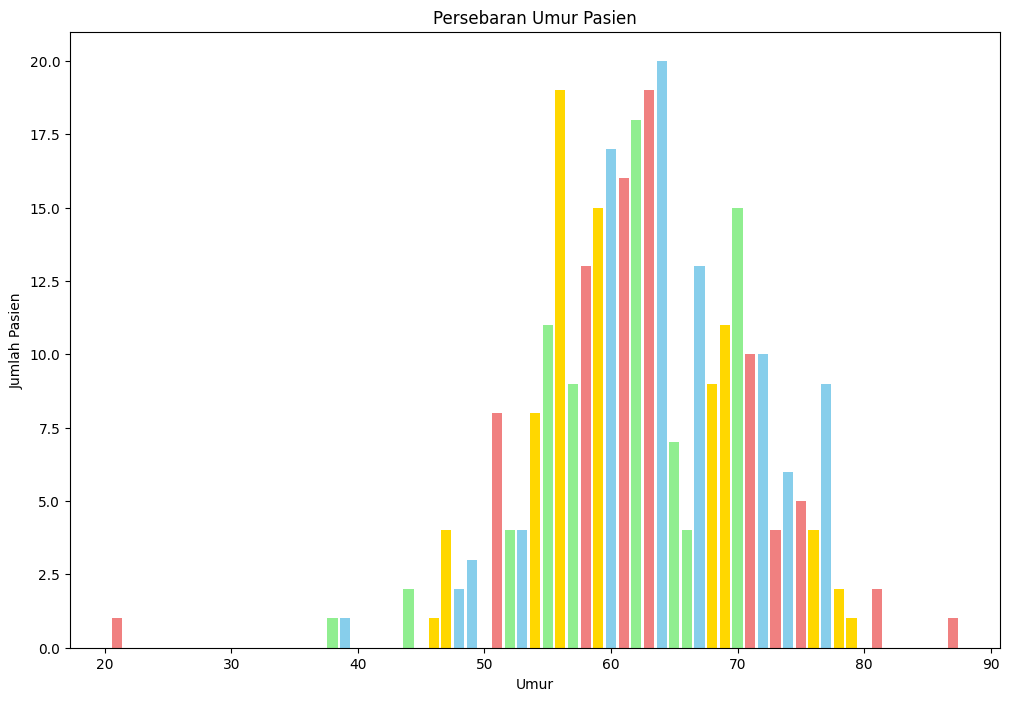

In [99]:
umur = df['AGE'].value_counts()

plt.figure(figsize=(12,8))
plt.bar(umur.index,umur.values,color=colors)
plt.title("Persebaran Umur Pasien")
plt.xlabel("Umur")
plt.ylabel("Jumlah Pasien")
plt.show()

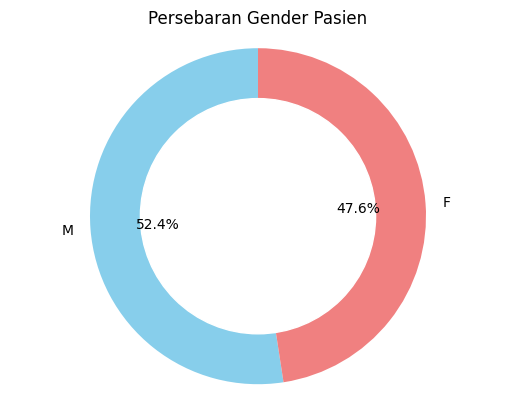

In [100]:
gender = df['GENDER'].value_counts()

plt.pie(gender, labels=gender.index,colors=colors, autopct='%1.1f%%', startangle=90)
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))  # Add a white circle at the center
plt.title('Persebaran Gender Pasien')
plt.axis('equal')
plt.show()

In [101]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [102]:
encoder = LabelEncoder()

df_heatmap = df.copy()


In [103]:
df_heatmap['GENDER'] = encoder.fit_transform(df_heatmap['GENDER'])

In [104]:
df_heatmap.drop(columns=['LUNG_CANCER'],inplace = True)
df_heatmap


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


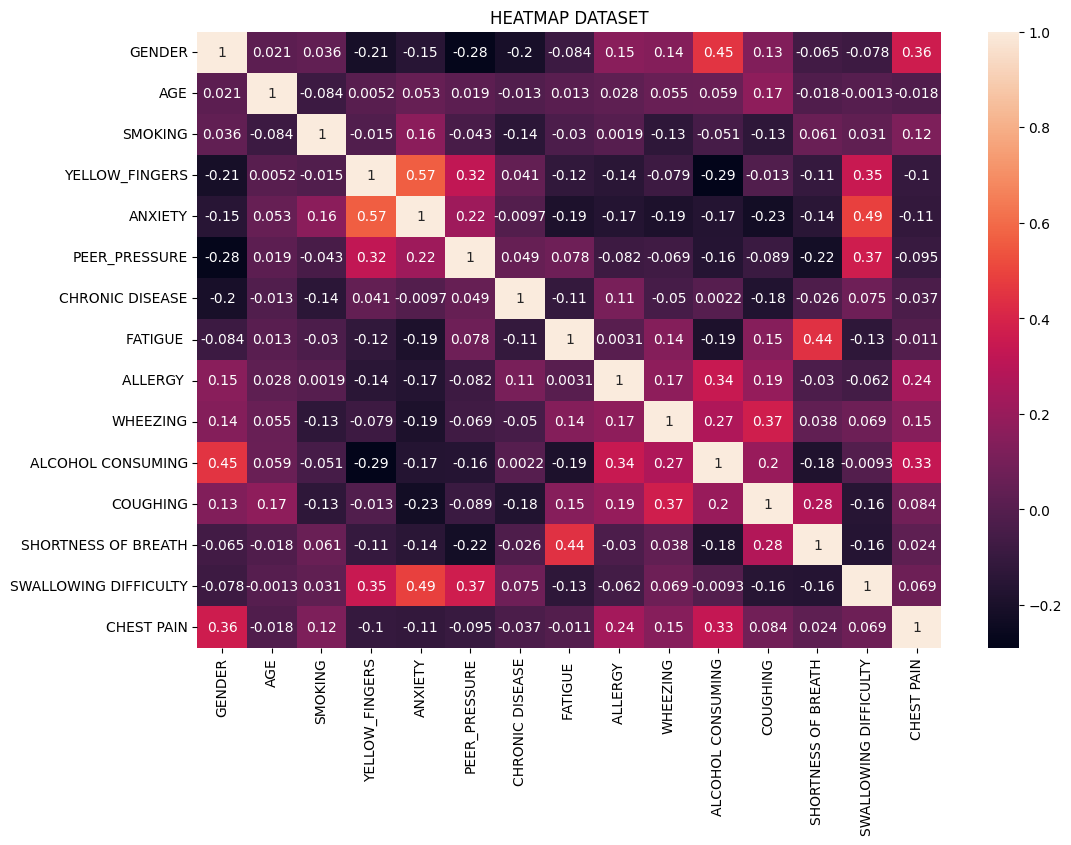

In [105]:
corr = df_heatmap.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)
plt.title("HEATMAP DATASET")
plt.show()

splitting the dataset

#prediction

In [106]:
df['GENDER'] = encoder.fit_transform(df['GENDER'])

In [107]:
# Konversi kolom 'AGE' ke tipe integer
df['AGE'] = df['AGE'].astype(int)


In [108]:
df_new = df.drop(columns=['AGE'])

In [109]:
# Mengonversi 'LUNG_CANCER' (jika 'LUNG_CANCER' adalah boolean atau kategori)
df_new['LUNG_CANCER'] = encoder.fit_transform(df_new['LUNG_CANCER'])

In [110]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [111]:
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [112]:
X = df_new.drop(columns=['LUNG_CANCER'])
y = df_new['LUNG_CANCER']

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
df_new

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [115]:
import pandas as pd
import statsmodels.api as sm

# Assuming your data is in a DataFrame called `data`
# X contains independent variables, y is the target variable
X = df_new[['SMOKING', 'YELLOW_FINGERS',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ',
       'ALCOHOL CONSUMING', 'COUGHING',
       'SWALLOWING DIFFICULTY']]  # Replace with your features
y = df_new['LUNG_CANCER']  # Replace with your target column

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary for significance and coefficients
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.156360
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                  309
Model:                          Logit   Df Residuals:                      299
Method:                           MLE   Df Model:                            9
Date:                Fri, 27 Dec 2024   Pseudo R-squ.:                  0.5876
Time:                        23:16:27   Log-Likelihood:                -48.315
converged:                       True   LL-Null:                       -117.15
Covariance Type:            nonrobust   LLR p-value:                 3.124e-25
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -27.3228      4.654     -5.871      0.000     -36.444     -18.

In [116]:
X

,const,SMOKING,YELLOW_FINGERS,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY
0,1.0,1,2,1,1,2,1,2,2,2
1,1.0,2,1,1,2,2,2,1,1,2
2,1.0,1,1,2,1,2,1,1,2,1
3,1.0,2,2,1,1,1,1,2,1,2
4,1.0,1,2,1,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
304,1.0,1,1,2,2,2,1,2,2,2
305,1.0,2,1,1,1,2,2,2,2,1
306,1.0,2,1,1,1,1,2,2,2,1
307,1.0,2,1,1,1,2,2,2,2,1


In [117]:
X = X.drop(columns=['const'])
y = y.drop(columns=['const'])

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [119]:
X_train

,SMOKING,YELLOW_FINGERS,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY
126,2,1,1,1,2,1,2,2,1
109,1,1,1,2,2,2,2,1,1
247,1,2,1,1,2,1,2,2,1
234,1,2,2,1,2,2,2,2,1
202,2,1,1,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...
188,2,2,2,2,1,1,1,1,1
71,2,2,2,1,2,1,1,2,2
106,2,2,2,2,2,1,1,1,2
270,2,1,1,1,2,1,1,1,1


In [120]:
logistic_model = LogisticRegression(max_iter=2000,random_state=42)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [121]:
y_pred = logistic_model.predict(X_test)

In [122]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.98
Confusion Matrix:
[[ 1  1]
 [ 0 60]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62



In [134]:
X_train

,SMOKING,YELLOW_FINGERS,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY
126,2,1,1,1,2,1,2,2,1
109,1,1,1,2,2,2,2,1,1
247,1,2,1,1,2,1,2,2,1
234,1,2,2,1,2,2,2,2,1
202,2,1,1,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...
188,2,2,2,2,1,1,1,1,1
71,2,2,2,1,2,1,1,2,2
106,2,2,2,2,2,1,1,1,2
270,2,1,1,1,2,1,1,1,1


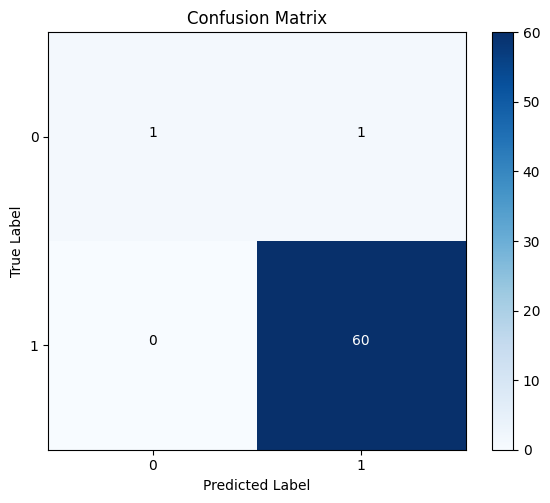

In [123]:

# Plot the confusion matrix using Matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the axes
classes = [0, 1]  # Replace with your class labels if needed
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.0  # Threshold for text color
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix[i, j]}', 
                 ha='center', 
                 color='white' if conf_matrix[i, j] > thresh else 'black')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## **SVM MODEL**

In [124]:
from sklearn.svm import SVC

svc_model = SVC(probability=True,random_state=42)

svc_model.fit(X_train,y_train)

y_pred_svc = svc_model.predict(X_test)

In [125]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svc)
class_report = classification_report(y_test, y_pred_svc)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix_svm)
print("Classification Report:")
print(class_report)


Accuracy: 0.97
Confusion Matrix:
[[ 1  1]
 [ 1 59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



## **EXTREME GRADIENT BOOSTING**

In [126]:
import xgboost as xgb

In [127]:
# Initialize the XGBoost classifier
model_xgb = xgb.XGBClassifier(
    n_estimators=200,  # Number of trees
    learning_rate=0.2, # Step size shrinkage
    max_depth=5,       # Maximum depth of a tree
    random_state=42    # Random seed
)

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


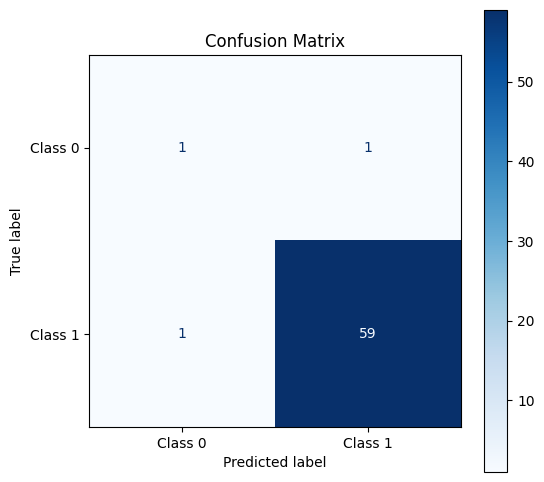

In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan Confusion Matrix
fig, ax = plt.subplots(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix")
plt.show()


<Figure size 1000x600 with 0 Axes>

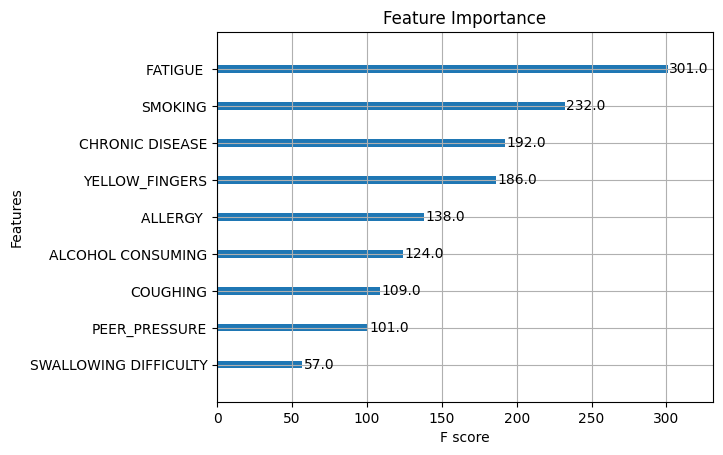

In [129]:
# Plot Feature Importance
plt.figure(figsize=(10,6))
xgb.plot_importance(model_xgb, max_num_features=10, importance_type='weight', title='Feature Importance')
plt.show()


### **KNN**

In [130]:
from sklearn.neighbors import KNeighborsClassifier
# Inisialisasi model KNN dengan K=3 (tetangga terdekat)
model_knn = KNeighborsClassifier(n_neighbors=5)

# Latih model
model_knn.fit(X_train, y_train)

# Prediksi dengan data test
y_pred = model_knn.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

Akurasi: 0.94


In [131]:
from sklearn.model_selection import GridSearchCV

# Menyiapkan parameter yang akan diuji
param_grid = {'n_neighbors': [1, 3, 5, 7, 9,11,13]}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Latih model menggunakan GridSearchCV
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik dan akurasi terbaik
print(f"Best K: {grid_search.best_params_['n_neighbors']}")
print(f"Best Accuracy: {grid_search.best_score_:.2f}")

Best K: 3
Best Accuracy: 0.89


In [132]:
# Menyimpan akurasi untuk berbagai nilai K
k_values = range(1, 11)  # Nilai K dari 1 hingga 10
train_accuracies = []
test_accuracies = []

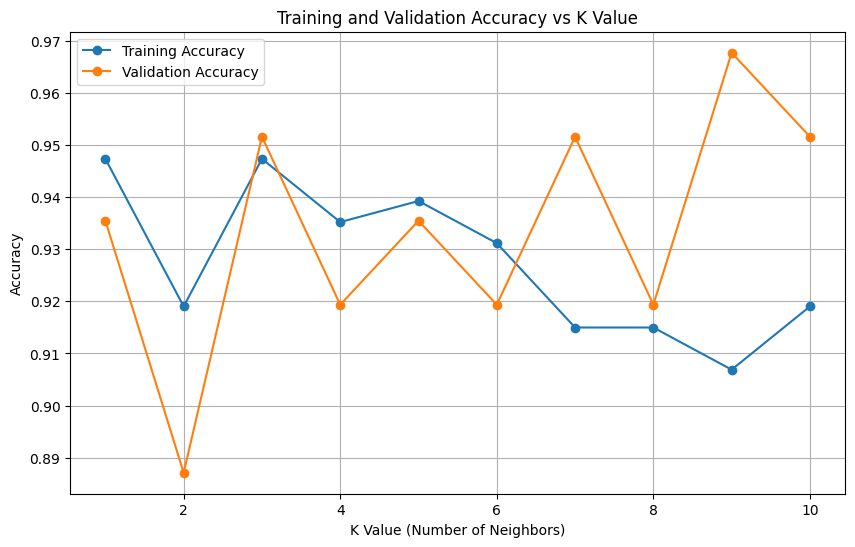

In [133]:
# Loop untuk menghitung akurasi pada setiap K
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Prediksi pada data pelatihan dan pengujian
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Hitung akurasi untuk pelatihan dan pengujian
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Simpan akurasi
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot grafik
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy vs K Value')
plt.xlabel('K Value (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

so with 4 models that i used between Logistic Regression,SVM,Extreme Gradient Boosting and KNN,the best model for this dataset is Extreme Gradient Boosting with 98% accuracy followed by SVM with 97% accuracy